# Artificial Neural Network

### Importing the libraries

In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [57]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [58]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [59]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [61]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [63]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [66]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [67]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [68]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [69]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [70]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [71]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


250/250 [==============================] - 1s 679us/step - loss: 0.5158 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 669us/step - loss: 0.4615 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 663us/step - loss: 0.4448 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 671us/step - loss: 0.4370 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 671us/step - loss: 0.4326 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 689us/step - loss: 0.4295 - accuracy: 0.7984
Epoch 7/100
250/250 [==============================] - 0s 671us/step - loss: 0.4266 - accuracy: 0.8106
Epoch 8/100
250/250 [==============================] - 0s 671us/step - loss: 0.4242 - accuracy: 0.8126
Epoch 9/100
250/250 [==============================] - 0s 671us/step - loss: 0.4221 - accuracy: 0.8161
Epoch 10/100
250/250 [==============================] - 0s 680us/step - loss: 0.4201 

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation



Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [72]:
print(ann.predict(sc.transform([[0.0, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 60ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [73]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 581us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1549   46]
 [ 262  143]]


0.846

In [75]:
# Evaluating, improving and tuning the ANN
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import cross_val_score 


In [76]:
def build_classifier ():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann
ann=KerasClassifier(build_fn=build_classifier,batch_size=10,nb_epoch=100)

C:\Users\Happy - Home\AppData\Local\Temp\ipykernel_7444\4280449037.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann=KerasClassifier(build_fn=build_classifier,batch_size=10,nb_epoch=100)


In [77]:
accu=cross_val_score(estimator=ann, X=X_train,y=y_train,cv=10)

80/80 [==============================] - 0s 658us/step - loss: 0.4362 - accuracy: 0.7987


In [78]:
mean=accu.mean()
variance=accu.std()
print(mean)
print(variance)

0.7990000009536743
0.01021334987243157


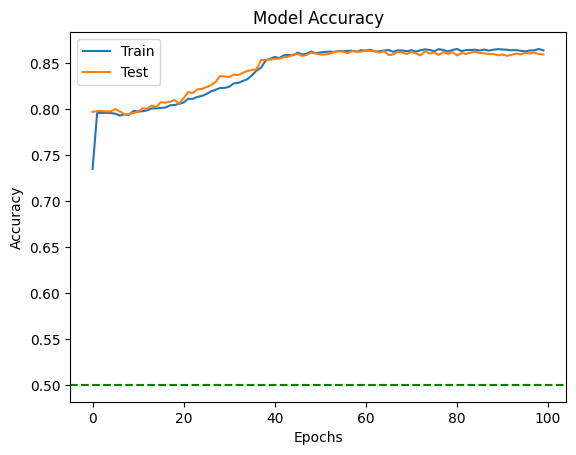

In [114]:
# Training the ANN on the Training set
# history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()




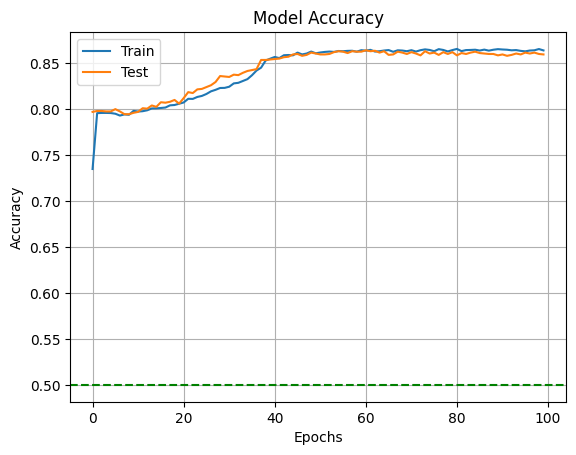

In [115]:
# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)  # Add grid lines
plt.legend(['Train', 'Test'])

# Add axis labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add legend and position it at the upper left corner
plt.legend(['Train', 'Test'], loc='upper left')

# Add a horizontal line for the general threshold value
plt.axhline(y=0.5, color='g', linestyle='--', label='Threshold')

plt.show()

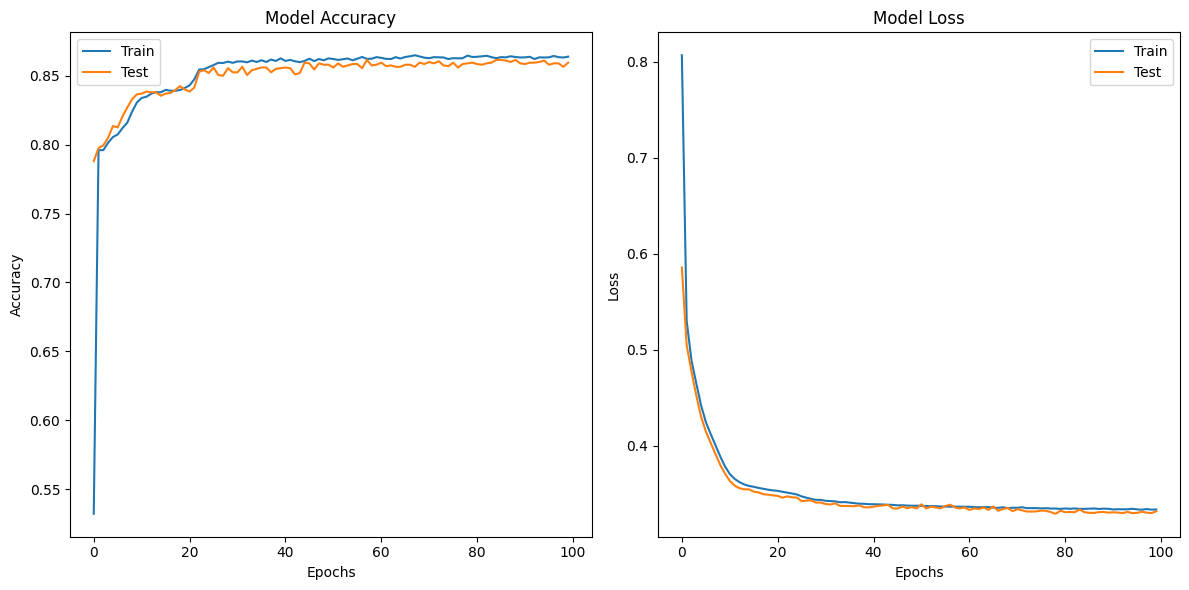

In [118]:
# Training the ANN on the Training set
# history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Plotting the accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

plt.tight_layout()
plt.show()


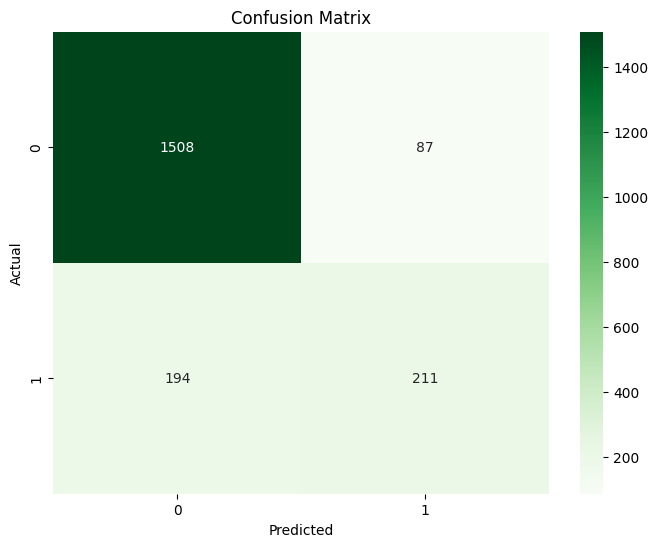

True Positives: 1508
True Negatives: 87
False Positives: 194
False Negatives: 211


In [125]:
# Creating the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Extracting TP, TN, FP, FN values
tp,tn, fp, fn = cm.ravel()

# Printing the values
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

In [94]:
from sklearn.metrics import precision_score, recall_score

# Set the desired threshold values for precision and recall
precision_threshold = 0.5
recall_threshold = 0.5

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# Accept or reject the model based on precision and recall
if precision >= precision_threshold and recall >= recall_threshold:
    print("Model Accepted")
else:
    print("Model Rejected")


63/63 [==============================] - 0s 661us/step
Precision: 0.7080536912751678
Recall: 0.5209876543209877
Model Accepted


In [103]:
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are the true labels and predicted labels, respectively

# Convert the boolean array y_pred to integer (0s and 1s)
y_pred_int = y_pred.astype(int)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_int)

print("F1 Score:", f1)


F1 Score: 0.6002844950213372


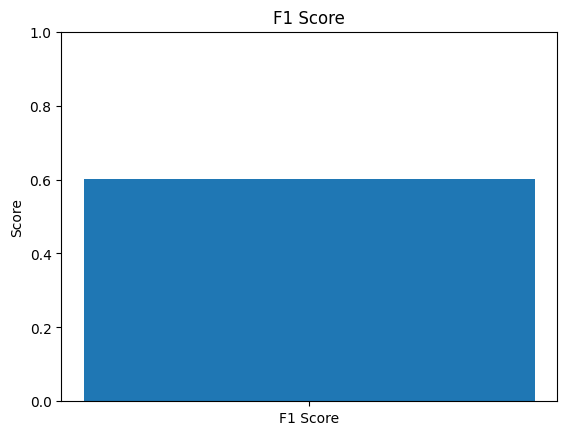

In [108]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Create a bar plot to visualize the F1 score
fig, ax = plt.subplots()
ax.bar(['F1 Score'], [f1])
ax.set_ylim([0, 1])  # Set y-axis limits
ax.set_ylabel('Score')
ax.set_title('F1 Score')
plt.show()
